In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
emb1 = pd.read_csv("data/results/features_extraction_emb1__2019-09-11-0134.csv")
emb10 = pd.read_csv("data/results/features_extraction_emb10__2019-09-11-0203.csv")
emb8 = pd.read_csv("data/results/features_extraction_emb8__2019-09-11-0325.csv")
emb1bis= pd.read_csv("data/results/features_extraction_emb{}__2019-09-11-1649.csv")

dataset = {1:emb1, 10: emb10,8: emb8}
dataset = {1:emb1bis}

#Clean outlyer
for i, emb in dataset.items():
    emb = emb.drop([0]).set_index("id").drop(["Unnamed: 0"], axis=1)
    dataset[i] = emb
    
print(dataset[1].columns)

Index(['area', 'centroid_x', 'centroid_y', 'centroid_z', 'depth', 'extent',
       'in_cell', 'max_intensity', 'mean_intensity', 'min_intensity',
       'solidity', 'total_intensity'],
      dtype='object')


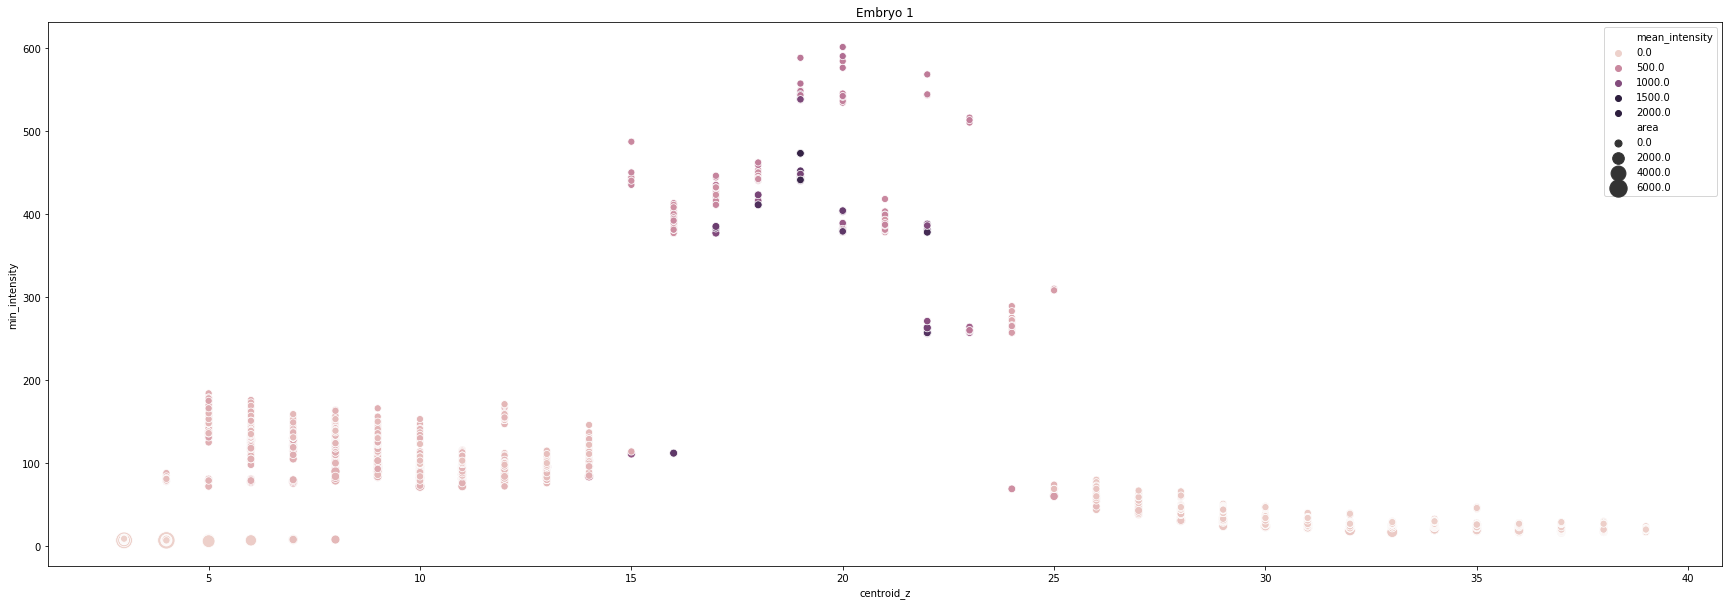

In [3]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[30,10*len(dataset)])
ax_i = 0
for i, emb in dataset.items():
    if len(dataset) > 1:
        sns.scatterplot(hue="mean_intensity",x='centroid_z', y="min_intensity", size="area", data=emb, sizes=(50,300), ax=axs[ax_i]).set_title("Embryo {}".format(i))
        ax_i+=1
    else:
        sns.scatterplot(hue="mean_intensity",x='centroid_z', y="min_intensity",size="area",sizes=(50,300), data=emb, ax=axs).set_title("Embryo {}".format(i))


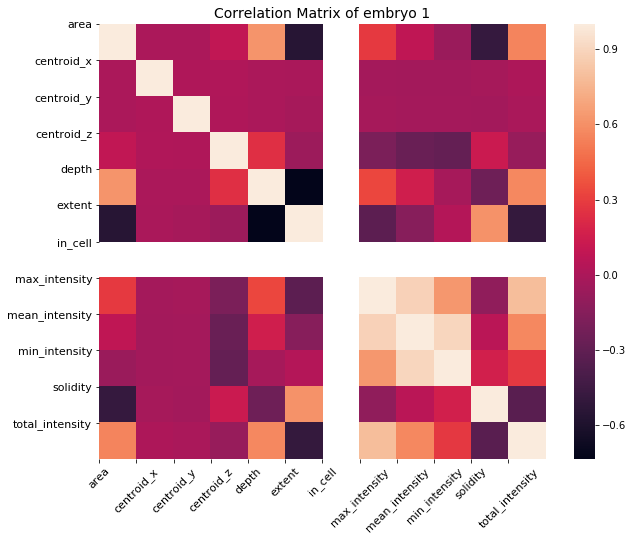

In [9]:
for i, emb in dataset.items():
    f = plt.figure(figsize=(10, 8))
    sns.heatmap(emb.corr()).set_title('Correlation Matrix of embryo {}'.format(i), fontsize=14);
    plt.xticks(range(emb.shape[1]), emb.columns, fontsize=11, rotation=45)
    plt.yticks(range(emb.shape[1]), emb.columns, fontsize=11)
    plt.show()

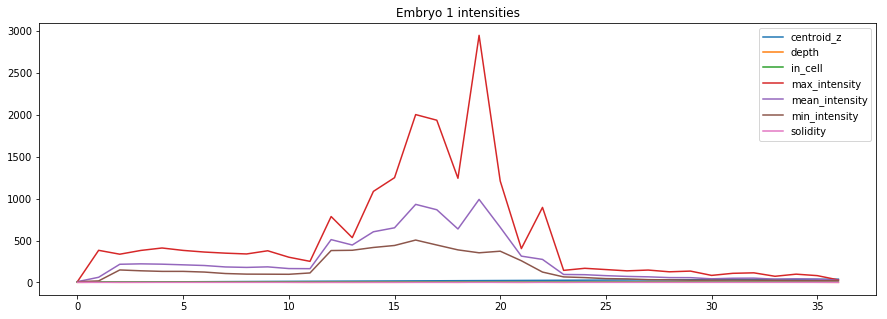

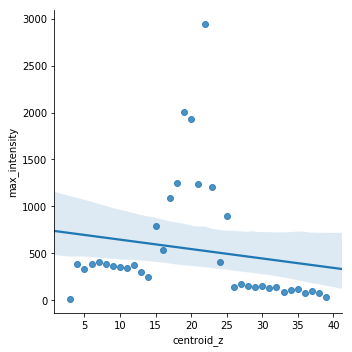

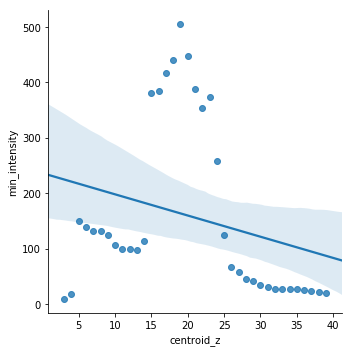

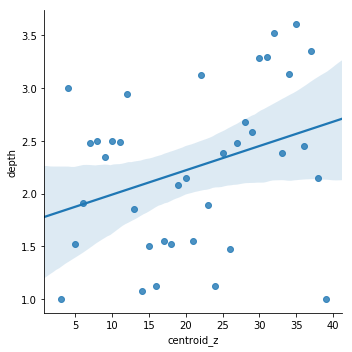

In [20]:
#calculer l'extent moyen en fonction de Z
avg_z_dataset = {}
for i, df in dataset.items():
    avg_z = df.groupby('centroid_z').mean().reset_index()
    avg_z_dataset[i]=avg_z
    avg_int = avg_z.drop(["total_intensity", "area","centroid_x","centroid_y", "extent"], axis=1)
    avg_int.plot(figsize=(15, 5), title="Embryo {} intensities".format(i))
    sns.lmplot(x="centroid_z",y="max_intensity", data=avg_int)
    sns.lmplot(x="centroid_z",y="min_intensity", data=avg_int)
    sns.lmplot(x="centroid_z",y="depth", data=avg_int)



# ne retenir que l'extent sup à ...


In [ ]:
for i, df in avg_z_dataset.items():
    df["depth"].plot(figsize=(15, 5),title="depth of Region3D")

In [ ]:
var_z_dataset={}
for i, df in dataset.items():
    var_z= df.groupby('centroid_z').var()
    var_z_dataset[i]=var_z
    var_int = var_z.drop(["total_intensity", "area","centroid_x","centroid_y", "depth", "extent"], axis=1).reset_index()
    #var_int.plot(figsize=(15, 5), title="Embryo {} intensities".format(i))
    var_int.plot(figsize=(15, 5), title="Embryo {} intensities".format(i))
    sns.lmplot(x="centroid_z",y="max_intensity", data=var_int, legend_out =True)
    sns.lmplot(x="centroid_z",y="min_intensity", data=var_int, legend_out =True)


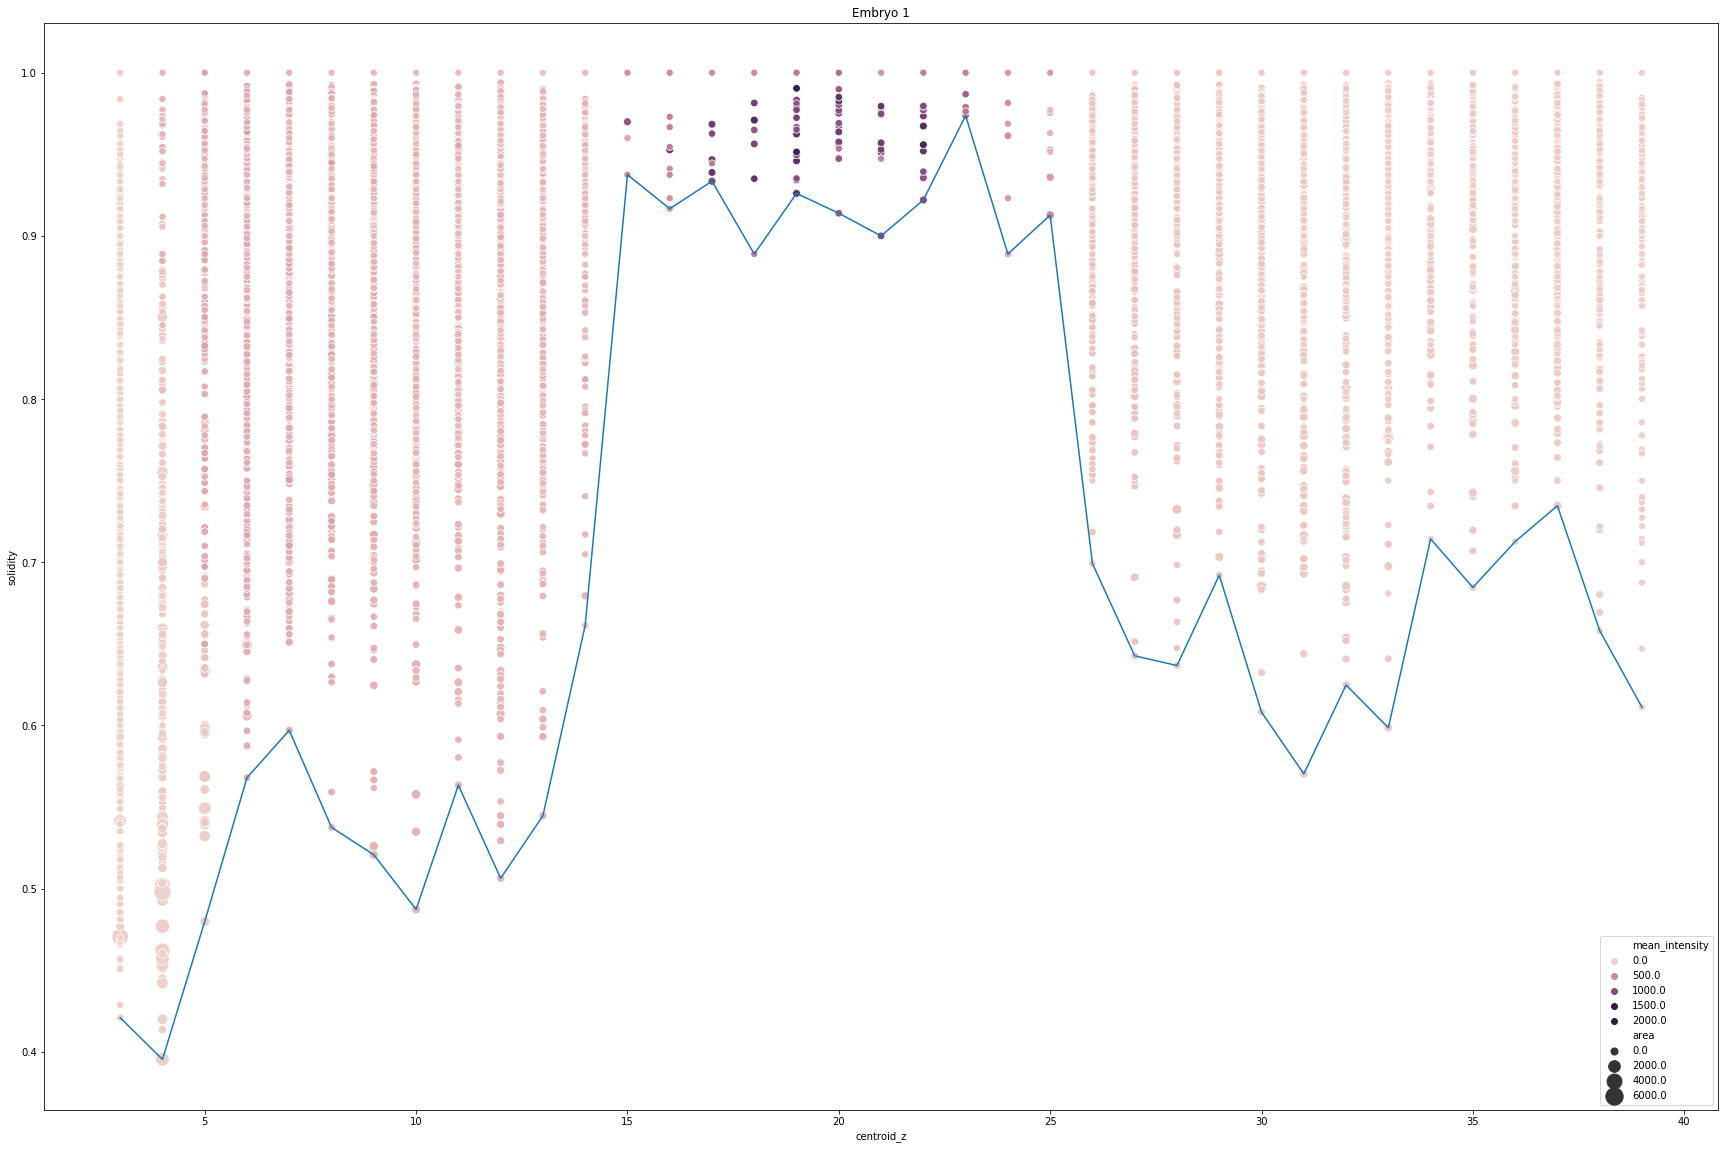

In [16]:
fig, axs = plt.subplots(1, 1, figsize=[30,10])
sns.scatterplot(hue="mean_intensity",x='centroid_z', y="solidity",size="area",sizes=(50,300), data=emb1bis, ax=axs).set_title("Embryo {}".format(i))
#sns.scatterplot(hue="mean_intensity",x='centroid_z', y="extent",size="area",sizes=(50,300), data=emb1bis, ax=axs[1]).set_title("Embryo {}".format(i))
min_z = emb1bis.groupby('centroid_z').min().reset_index()
sns.lineplot(x="centroid_z",y="solidity", data=min_z)

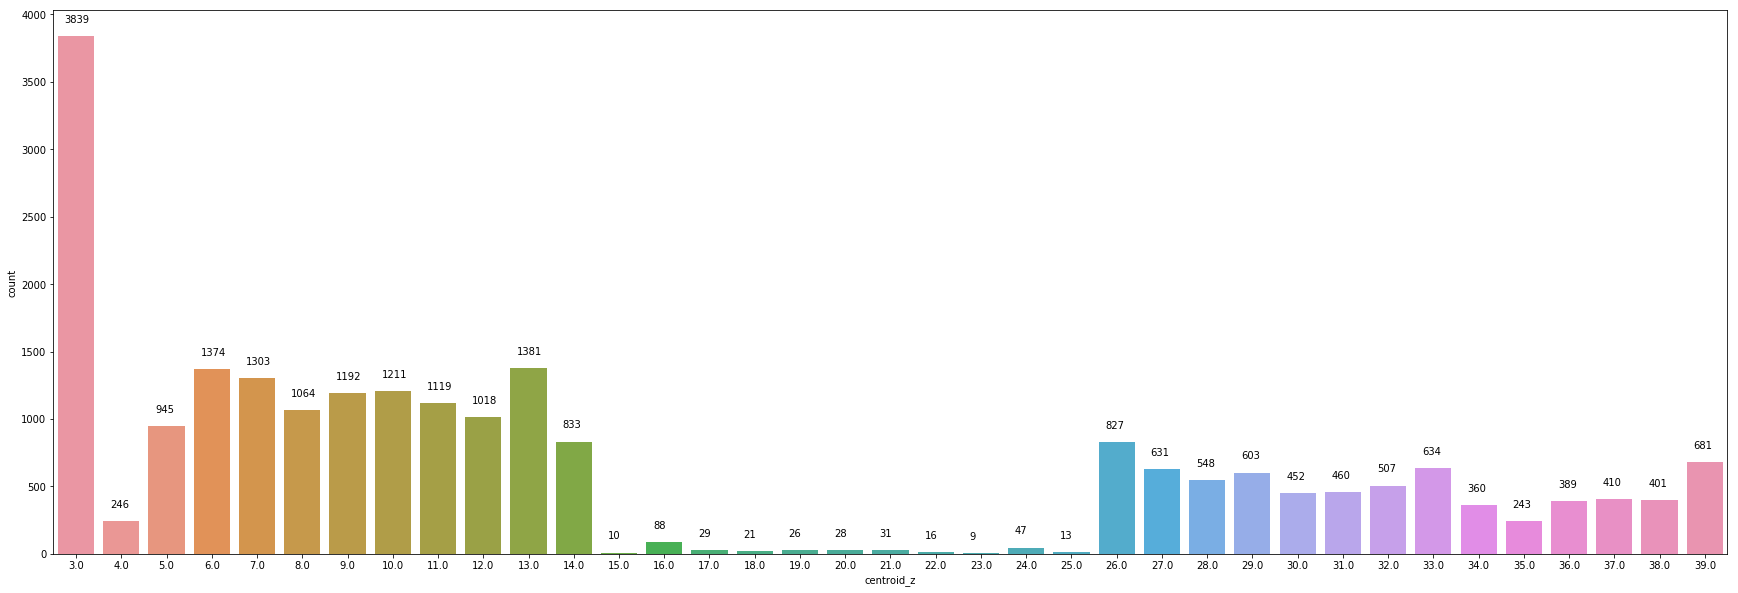

In [31]:
count = emb1bis.groupby('centroid_z').count()["id"]
fig, ax = plt.subplots(1, 1, figsize=[30,10])
sns.countplot(x="centroid_z", data=emb1bis, ax=ax)
#for p, label in zip(ax.patches, emb1bis["centroid_z"].value_counts()):
#    ax.annotate(label, (p.get_x()+0.15, p.get_height()+100))
for p, label in zip(ax.patches, count):
    ax.annotate(label, (p.get_x()+0.15, p.get_height()+100))
